In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

# Zad
Wykonaj klasyfikację danych MNIST za pomocą regresji logistycznej.

In [8]:
# from tensorflow.keras.datasets import mnist
# mnist = mnist
# mnist.load_data()

In [9]:
from six.moves import urllib
from sklearn.datasets import fetch_mldata

from scipy.io import loadmat
mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
mnist_path = "./mnist-original.mat"
response = urllib.request.urlopen(mnist_alternative_url)
with open(mnist_path, "wb") as f:
    content = response.read()
    f.write(content)
mnist_raw = loadmat(mnist_path)
mnist = {
   "data": mnist_raw["data"].T,
   "target": mnist_raw["label"][0],
   "COL_NAMES": ["label", "data"],
   "DESCR": "mldata.org dataset: mnist-original",
}
print("Success!")

X = mnist["data"]
y = mnist["target"]

Success!


In [10]:
np.random.seed(42)

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# from sklearn.datasets import fetch_mldata
# from sklearn.linear_model import LogisticRegression

# mnist = fetch_mldata('MNIST original')
# X = mnist.data.astype('float64')
# y = mnist.target
# print(X.shape, " ", y.shape)

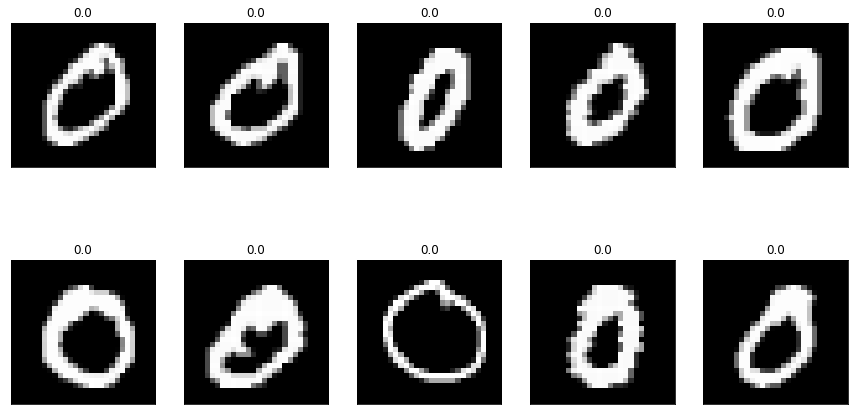

In [12]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(y, X, axes.ravel()):
    ax.imshow(image.reshape(28, 28), cmap=plt.cm.gist_gray)
    ax.set_title(target)
plt.show() 

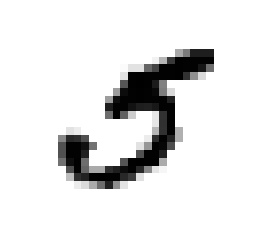

In [11]:
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [12]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

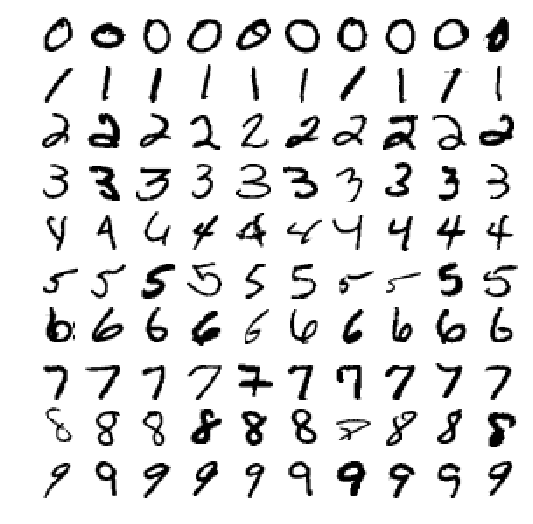

In [13]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
seed=123

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

print(X_train.shape)
print(y_train.shape)

(56000, 784)
(56000,)


# Zad
Jeżeli nie zredukujesz wymiarów to będzie się liczyć bardzo długo (odradzam sprawdzanie).

In [ ]:
# clf = LogisticRegression(random_state=42)
# clf.fit(X_train, y_train)
# from sklearn.metrics import f1_score
# f1_score(y_true = y_tes , y_pred = clf.predict(X_test))

# Zad
Wyznacz optymalną ilość współrzędnych w PCA


In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
plt.bar(range(pca.n_components_),pca.explained_variance_ratio_)
plt.show()

# Zad
Zredukuj wymiar do **n_components=10** i wykonaj klasyfikację.

Jakie uzyskałeś **accuracy_score**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
pca = PCA(n_components=10)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

clf = LogisticRegression(random_state=42)
# learning an LR on the scaled training data
clf.fit(X_train_pca, y_train)

In [ ]:
# scoring on the scaled test set
print("Scaled test set accurac: {:.2f}".format( metrics.accuracy_score( y_pred = clf.predict(X_test_pca), y_true = y_test)) )

# Zad
Wykonaj analogiczne zadanie za pomoca: 

```python
from sklearn.pipeline import Pipeline
```

# Zad.

Narysuj zależność ilości wymiarów i miary Accuracy dla

**
n_components = 2,...,20
**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

accuracy_array = []

for i in range(1,20):
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=i)),
        ("LR", LogisticRegression(random_state=42))    
    ])

    pipe.fit(X_train, y_train)
    acc = metrics.accuracy_score( y_pred = pipe.predict(X_test), y_true = y_test)
    accuracy_array.append(acc)

In [ ]:
t=range(1,20)

plt.plot(accuracy_array, "o-", label="Accuracy")
plt.xticks(range(len(t)), t, size='small')
plt.legend()
plt.show()

# Zad
Wykonaj GridSearch po ilości komponentów do której redukujesz wymiar do redukcji.

Sprawdź

**
n_components = 2,...,20
**

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [21]:
pipe = Pipeline([
        ("scaler", StandardScaler()), 
        ("pca", PCA(n_components=3)),
        ("LR", LogisticRegression(random_state=42))    
    ])

param_grid = {'scaler': [None],
            'pca__n_components': np.arange(1, 5)}

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=5, random_state=seed)

grid = GridSearchCV(pipe, param_grid=param_grid, cv=kfold)
grid.fit(X_train, y_train)

C:\Users\przem\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\przem\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\przem\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\przem\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\przem\AppData\Local\Continuum\anaco

GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=False),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('LR', LogisticRegression(C=1.0, class_weight=None, dual=Fa...lty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'scaler': [StandardScaler(copy=True, with_mean=True, with_std=True), None], 'pca__n_components': array([1, 2, 3, 4])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [23]:
print("Best parameters: ", grid.best_params_)
print("Test Accuracy: {:.2f}".format( metrics.accuracy_score( y_pred = grid.predict(X_test), y_true = y_test) ))

Best parameters:  {'pca__n_components': 4, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}
Test Accuracy: 0.59


C:\Users\przem\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
